# Clasificación de flores Iris

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets  #(datasets permite importar datasets)
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Importar datasets
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [7]:
# Cómo se descargó como Array, debemos seleccionar las columnas que necesitamos

X = iris.data[:,:2]
Y = iris.target

In [11]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+ 1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+ 1
h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot= np.c_[xx.ravel(), yy.ravel()]

In [16]:
C = 1.0
svc = svm.SVC(kernel = 'linear',
             C=C, decision_function_shape = 'ovr').fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'Support Vector Classifier for Iris Flowers')

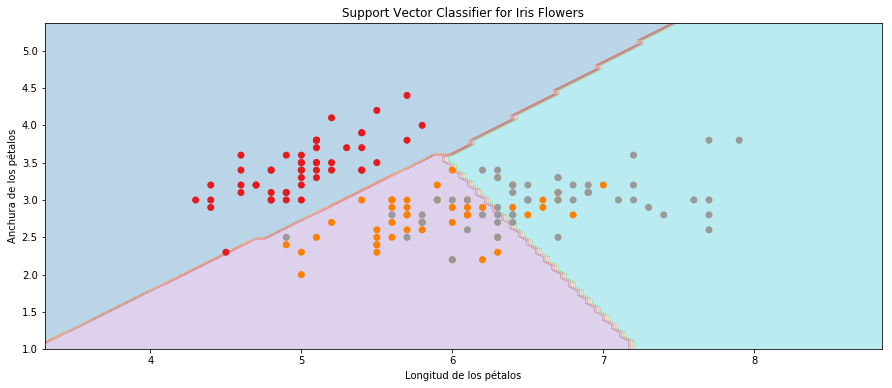

In [23]:
plt.figure(figsize = (15,6))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c = Y, cmap = plt.cm.Set1)
plt.xlabel('Longitud de los pétalos')
plt.ylabel('Anchura de los pétalos')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier for Iris Flowers')

In [24]:
C = 1.0
svc = svm.SVC(kernel = 'rbf',
             C=C, decision_function_shape = 'ovr').fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

C:\Users\TOM.ZG\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'Support Vector Classifier for Iris Flowers with Radial Kernel')

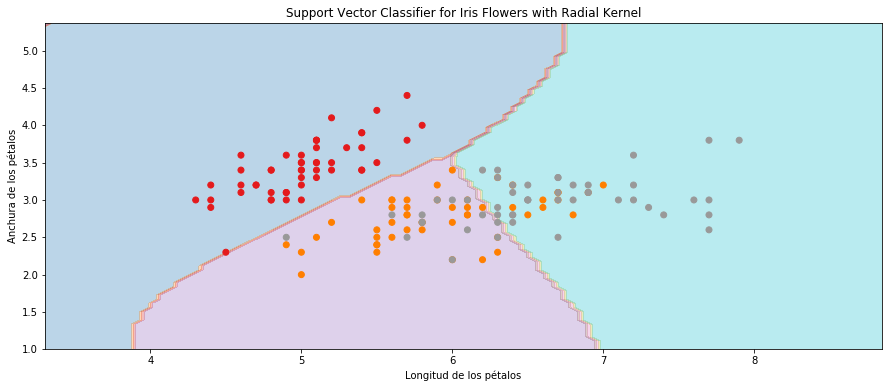

In [26]:
plt.figure(figsize = (15,6))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c = Y, cmap = plt.cm.Set1)
plt.xlabel('Longitud de los pétalos')
plt.ylabel('Anchura de los pétalos')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier for Iris Flowers with Radial Kernel')

C:\Users\TOM.ZG\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'Support Vector Classifier for Iris Flowers with Polynomial Kernel')

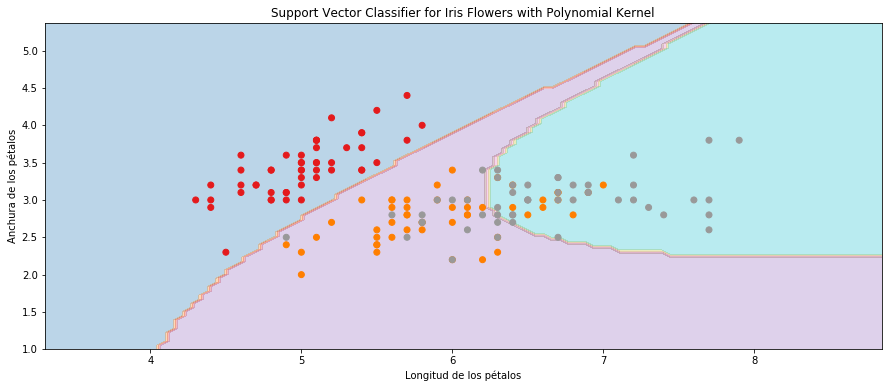

In [27]:
C = 1.0
svc = svm.SVC(kernel = 'poly',
             C=C, decision_function_shape = 'ovr').fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize = (15,6))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c = Y, cmap = plt.cm.Set1)
plt.xlabel('Longitud de los pétalos')
plt.ylabel('Anchura de los pétalos')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier for Iris Flowers with Polynomial Kernel')

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle


In [29]:
X, Y = shuffle(X,Y, random_state = 0)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [33]:
parameters = [
    {
        'kernel':['rbf'],
        'gamma':[1e-4, 1e-3, 1e-2, 0.1,0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel':['linear'],
        'C':[1,10,100,1000]        
    }
]

In [37]:
clf = GridSearchCV(svm.SVC(decision_function_shape = 'ovr'), param_grid = parameters, cv = 5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [41]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m, s, p in zip(means, stds, params):
    print("%0.3f (+/-%0.3f) para %r"%(m, s, p))

0.747 (+/-0.062) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.065) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+/-0.058) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.062) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 (+/-0.049) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.767 (+/-0.063) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.062) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+/-0.053) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/-0.040) para {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.767 (+/-0.042) para {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
0.813 (+/-0.062) para {'C': 1000, 'ga